In [1]:
output_path="output_sweep/"
dataset="cifar10"
models=['lowres_densenet121','lowres_resnet50','lowres_resnet9','lowres_vgg16_bn']
checkpoints=[7,8,9,10,11]
compare_checkpoints=[1,2,3,4,5]
checkpoint_names=[
    "cifar10_model",
    "cifar100_model",
    "grocerystore_model",
    "svhn_model",
    "tinyimagenet_model"
]

In [2]:
import yaml
import os
import pandas as pd
import seaborn as sns
# from matplotlib import rcParams

In [30]:
def plot_hyperparameters_difference(checkpoints,compare_checkpoints,output_path,dataset,models,checkpoint_names):
    hyperparameters = []

    for model in models:
        for idx,checkpoint in enumerate(checkpoints):
            with open(os.path.join(output_path,dataset,model,f"version_{checkpoint}","hparams.yaml")) as stream:
                data_loaded = yaml.safe_load(stream)
            hyperparameters.append({
                'model':model,
                'checkpoint':checkpoint_names[idx],
                'learning_rate':float(data_loaded['hparams']['learning_rate']),
                'max_epochs':int(data_loaded['hparams']['max_epochs']),
                'weight_decay': float(data_loaded['hparams']['weight_decay']),
                'optimizer': str(data_loaded['hparams']['optimizer']),
                'name': 'Full Dataset'
                                 })

    for model in models:
        for idx,checkpoint in enumerate(compare_checkpoints):
            with open(os.path.join(output_path,dataset,model,f"version_{checkpoint}","hparams.yaml")) as stream:
                data_loaded = yaml.safe_load(stream)
            hyperparameters.append({
                'model':model,
                'checkpoint':checkpoint_names[idx],
                'learning_rate':float(data_loaded['hparams']['learning_rate']),
                'max_epochs':int(data_loaded['hparams']['max_epochs']),
                'weight_decay': float(data_loaded['hparams']['weight_decay']),
                'optimizer': str(data_loaded['hparams']['optimizer']),
                'name': "Minimized Dataset"
                                 })

    hyperparameters=pd.DataFrame.from_records(hyperparameters)
    
    sns.set_theme()
    
    plot=sns.catplot(x = "checkpoint",       # x variable name
            y = "learning_rate",       # y variable name
            hue = "name",  # group variable name
            data = hyperparameters,     # dataframe to plot
            kind = "bar",
            col="model",
            log=True,
            col_wrap=2,
            aspect=.8)
    plot.fig.set_size_inches(20,7)
    plot.set(yticks=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
    plot.fig.subplots_adjust(top=0.9,left=0.2)
    plot.fig.suptitle('Learning Rate')
    plot.set_xticklabels(rotation=30)
    
    plot=sns.catplot(x = "checkpoint",       # x variable name
            y = "weight_decay",       # y variable name
            hue = "name",  # group variable name
            data = hyperparameters,     # dataframe to plot
            kind = "bar",
            col="model",
            log=True,
            col_wrap=2,
            aspect=.8)
    plot.fig.set_size_inches(20,7)
    plot.fig.subplots_adjust(top=0.9,left=0.2)
    plot.fig.suptitle('Weight Decay')
    plot.set(yticks=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
    plot.set_xticklabels(rotation=30)
    

    plot=sns.catplot(x = "checkpoint",       # x variable name
            y = "max_epochs",       # y variable name
            hue = "name",  # group variable name
            data = hyperparameters,     # dataframe to plot
            kind = "bar",
            col="model",
            # log=True,
            col_wrap=2,
            aspect=.8)
    plot.fig.set_size_inches(20,7)
    plot.fig.subplots_adjust(top=0.9,left=0.2)
    plot.fig.suptitle('Max Epochs')
    # plot.set(yticks=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
    plot.set_xticklabels(rotation=30)

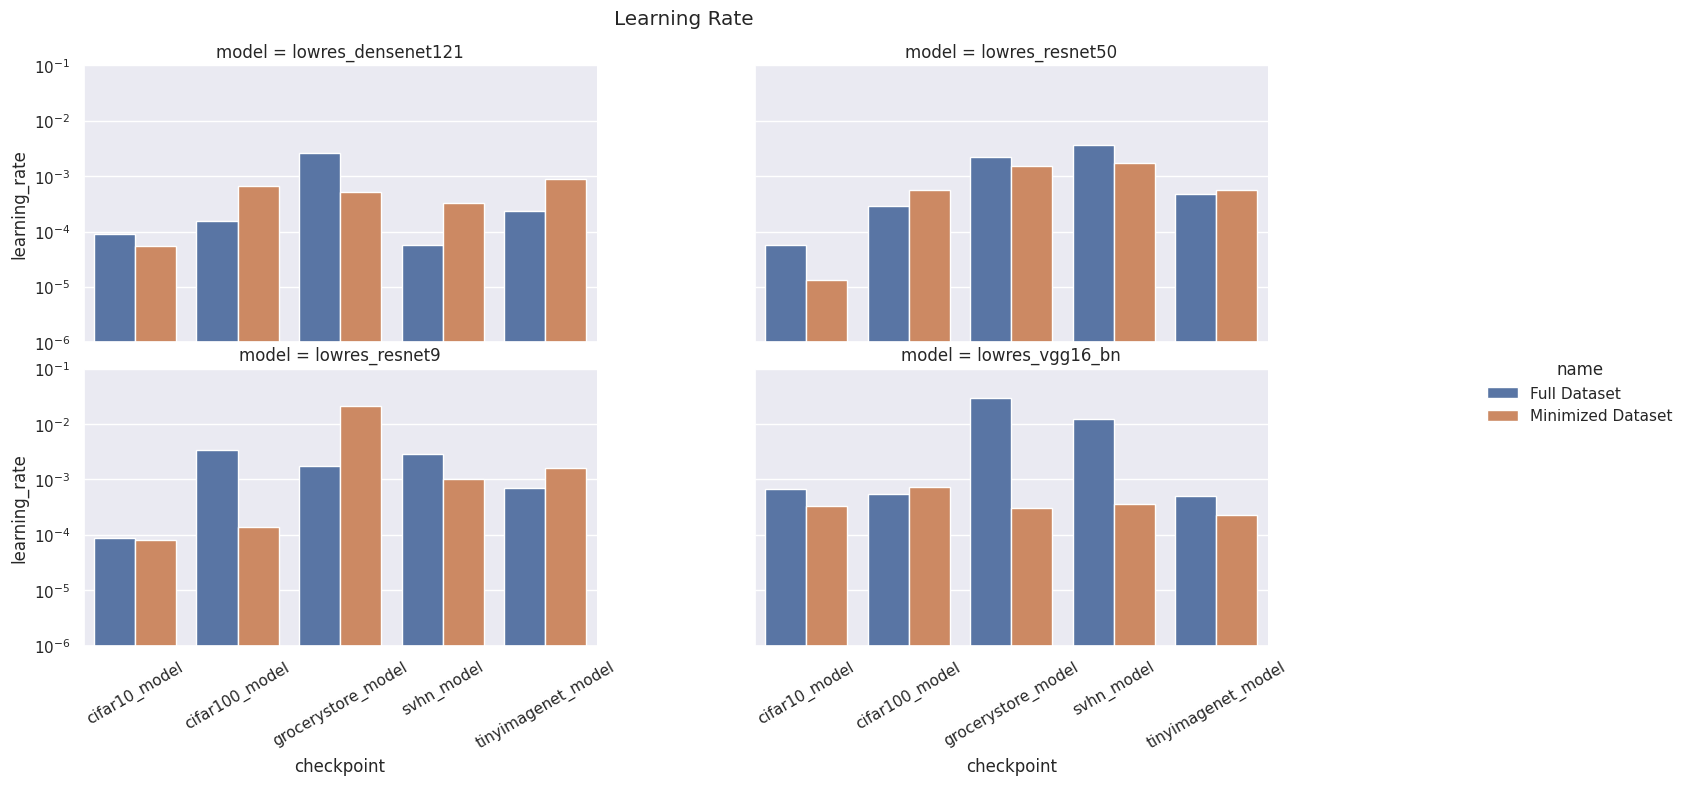

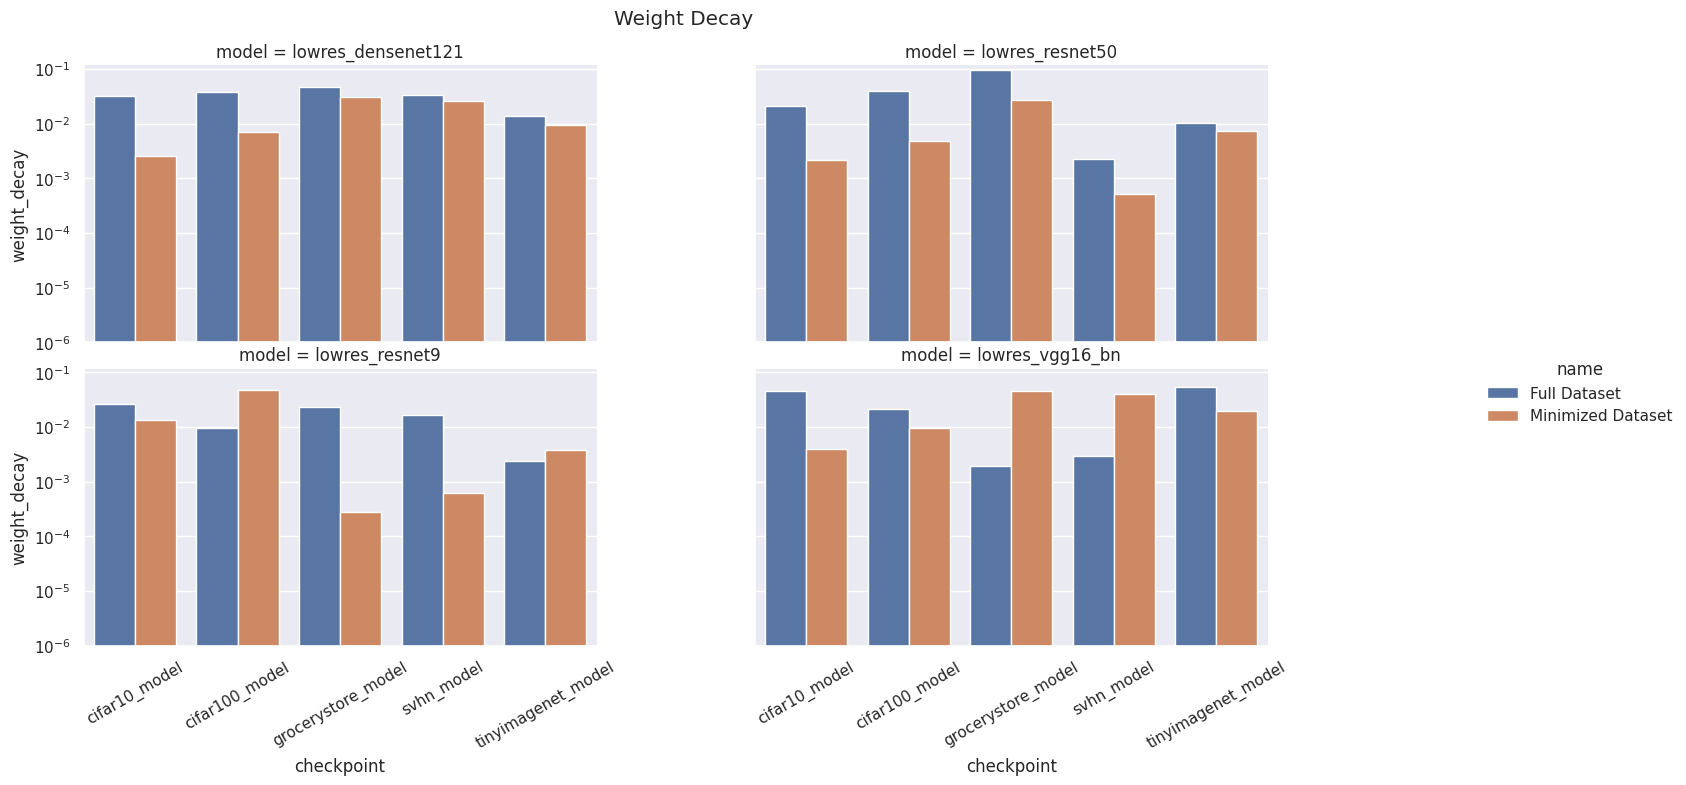

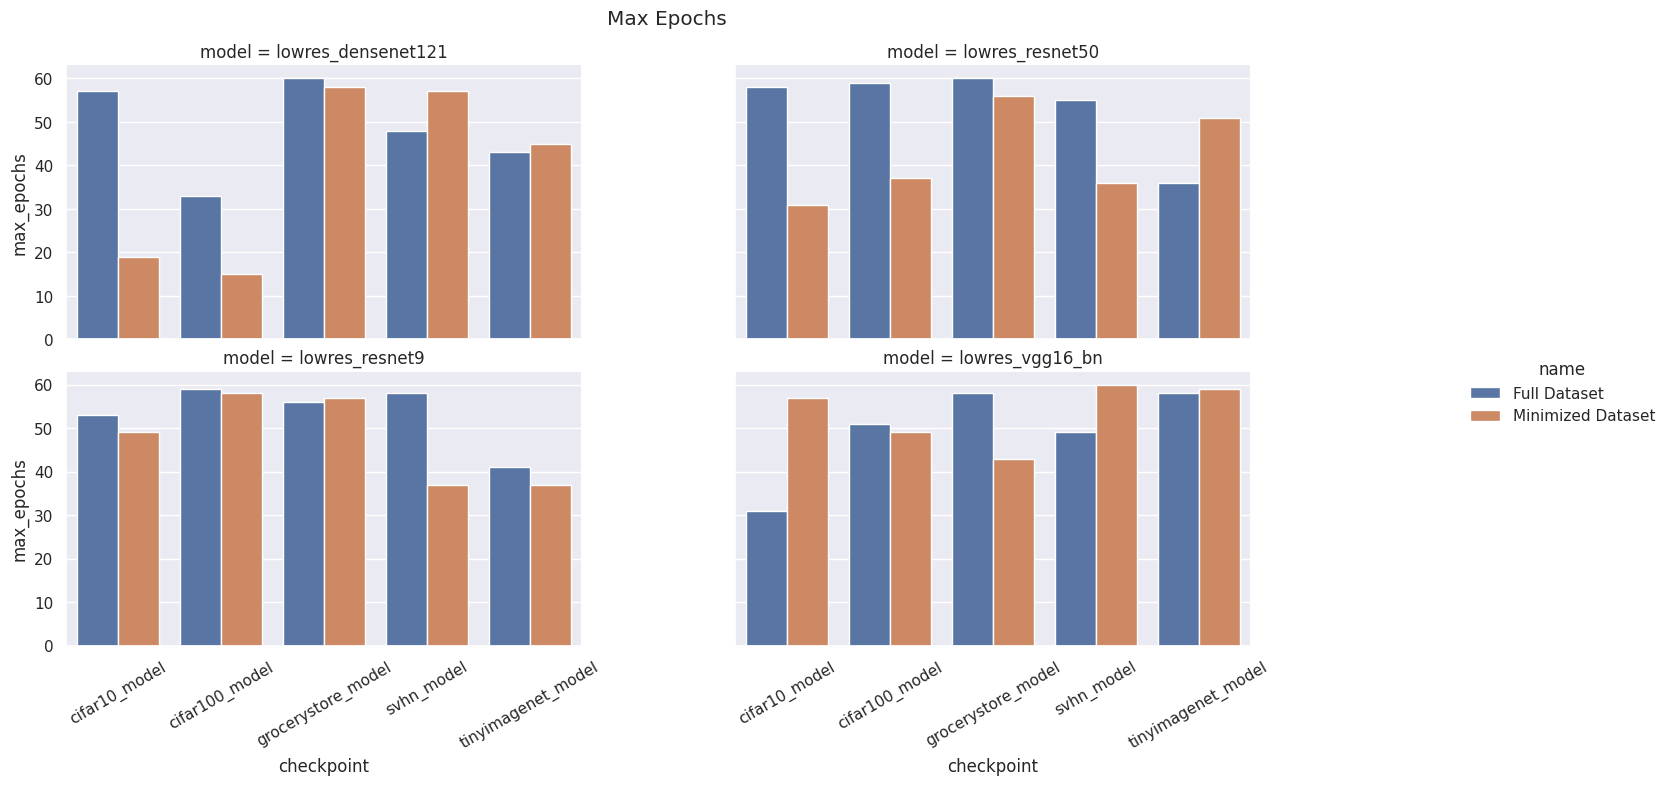

In [31]:
plot_hyperparameters_difference(checkpoints,compare_checkpoints,output_path,dataset,models,checkpoint_names)